In [1]:
# Imports 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
# Load Data
data = fashion_mnist.load_data()
(train_x, train_y), (test_x, test_y) = data

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

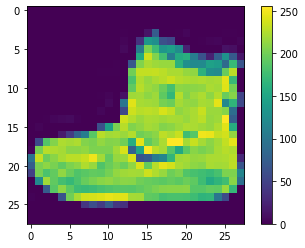

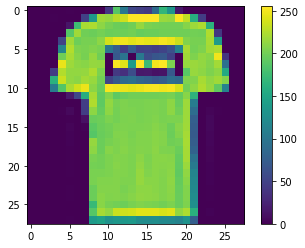

(None, None)

In [4]:
# Plot first two inputs before any preprocessing
def plot_img(img):
    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()
plot_img(train_x[0]), plot_img(train_x[1])

In [5]:
# Transform data
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)

train_y = keras.utils.to_categorical(train_y, num_classes=10)
test_y = keras.utils.to_categorical(test_y, num_classes=10)

train_x = train_x.astype('float32')
test_x = test_x.astype('float32')

train_x = train_x / 255
test_x = test_x / 255

In [6]:
## Create Keras Sequential CNN
model = keras.Sequential()
model.add(keras.layers.Input(shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=15, kernel_size=4))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Conv2D(filters=30, kernel_size=4))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(.2))
model.add(keras.layers.Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 15)        255       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 15)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 12, 12, 15)        60        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 30)          7230      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 4, 4, 30)          120       
_________________________________________________________________
flatten (Flatten)            (None, 480)               0

In [7]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
train_x.shape

(60000, 28, 28, 1)

In [9]:
train_y.shape

(60000, 10)

In [10]:
# Train the model
model.fit(train_x, train_y, validation_data=(test_x, test_y), batch_size=2048, epochs=25)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 17s 281us/sample - loss: 1.5219 - accuracy: 0.4704 - val_loss: 1.9650 - val_accuracy: 0.6161
Epoch 2/25
60000/60000 [==============================] - 18s 307us/sample - loss: 0.9616 - accuracy: 0.6660 - val_loss: 1.7810 - val_accuracy: 0.5894
Epoch 3/25
60000/60000 [==============================] - 19s 324us/sample - loss: 0.7635 - accuracy: 0.7296 - val_loss: 1.6029 - val_accuracy: 0.5334
Epoch 4/25
60000/60000 [==============================] - 24s 395us/sample - loss: 0.6583 - accuracy: 0.7669 - val_loss: 1.4761 - val_accuracy: 0.4901
Epoch 5/25
60000/60000 [==============================] - 22s 363us/sample - loss: 0.5970 - accuracy: 0.7904 - val_loss: 1.3656 - val_accuracy: 0.4980
Epoch 6/25
60000/60000 [==============================] - 23s 390us/sample - loss: 0.5527 - accuracy: 0.8071 - val_loss: 1.2302 - val_accuracy: 0.5216
Epoch 7/25
60000/60000 [====================

In [12]:
# Save model into directory 'my_model'
keras.models.save_model(model,'./my_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./my_model/assets


In [13]:
# Confirm saved model works after reloading
loaded_model = keras.models.load_model('./my_model')
loaded_model.predict(test_x)

array([[4.6980095e-09, 1.3637377e-09, 2.1391227e-09, ..., 1.0937278e-03,
        1.3454794e-08, 9.9776101e-01],
       [6.6329510e-04, 4.2037090e-08, 9.9888974e-01, ..., 4.3300137e-09,
        3.7253085e-09, 1.4893838e-11],
       [2.5905276e-09, 1.0000000e+00, 2.0820825e-14, ..., 3.8745542e-16,
        3.2547228e-15, 6.7939877e-16],
       ...,
       [6.2333443e-04, 2.3058878e-07, 9.8730343e-06, ..., 5.2536898e-06,
        9.9865723e-01, 2.5878066e-07],
       [1.5719917e-06, 9.9999785e-01, 9.4260699e-10, ..., 9.6233273e-12,
        5.4065776e-11, 3.2131856e-11],
       [8.5062289e-04, 4.1498392e-05, 5.2707089e-04, ..., 3.7686130e-01,
        1.3755905e-03, 2.3258154e-03]], dtype=float32)